In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\Asrar\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 20, 16

In [3]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
#rcParams['figure.figsize'] = 17.5, 14

In [7]:
df=pd.read_csv("Maternal Health Risk Data Set.csv")
df.head(7)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [9]:
df.select_dtypes(include=['object'])

,RiskLevel
0,high risk
1,high risk
2,high risk
3,high risk
4,low risk
...,...
1009,high risk
1010,high risk
1011,high risk
1012,high risk


In [10]:
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [11]:
df['RiskLevel'] = preprocessing.LabelEncoder().fit_transform(df['RiskLevel'])
df.head(7)    
              # low risk    = 1
              # mid risk    = 2
              # high risk   = 0

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,0
1,35,140,90,13.00,98.0,70,0
2,29,90,70,8.00,100.0,80,0
3,30,140,85,7.00,98.0,70,0
4,35,120,60,6.10,98.0,76,1
5,23,140,80,7.01,98.0,70,0
6,23,130,70,7.01,98.0,78,2


In [12]:
df['RiskLevel'].value_counts()     # low risk    = 1
                                   # mid risk    = 2
                                   # high risk   = 0

1    406
2    336
0    272
Name: RiskLevel, dtype: int64

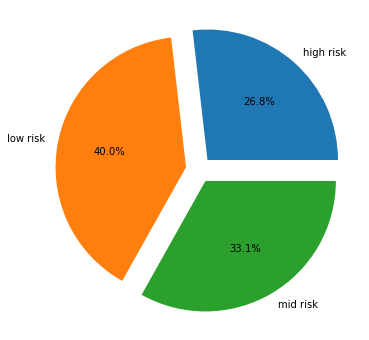

In [13]:
plt.figure(figsize=(6,6))
pie = df.groupby('RiskLevel')['RiskLevel'].count()
plt.pie(pie, explode=[0.1, 0.1,0.1], labels=['high risk','low risk','mid risk'], autopct='%1.1f%%');

([<matplotlib.patches.Wedge at 0x13011985a30>,
 [Text(-0.8210979005527542, 0.7319824025943925, 'mid risk'),
  Text(-0.21668815112139325, -1.0784462180209045, 'low risk'),
  Text(0.9492017238169262, 0.5558921545614542, 'high risk')],
 [Text(-0.4478715821196841, 0.39926312868785047, '26.82'),
  Text(-0.1181935369753054, -0.5882433916477661, '40.04'),
  Text(0.5177463948092325, 0.30321390248806596, '33.14')])

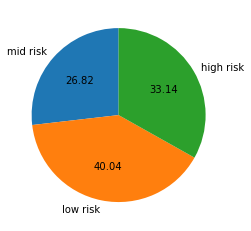

<Figure size 720x720 with 0 Axes>

In [14]:
figureObject, axesObject = plt.subplots()
plt.figure(figsize=(10,10))
pie1 = df.groupby('RiskLevel')['RiskLevel'].count()


axesObject.pie(pie1,

        labels=['mid risk','low risk','high risk'],

        autopct='%1.2f',
               explode=None,

        startangle=90)

In [15]:
corr_matrix=df.corr()
corr_matrix
corr_matrix["RiskLevel"].sort_values(ascending=False)

RiskLevel      1.000000
BodyTemp      -0.006680
HeartRate     -0.111637
SystolicBP    -0.208797
Age           -0.211851
DiastolicBP   -0.284633
BS            -0.479958
Name: RiskLevel, dtype: float64

<AxesSubplot:>

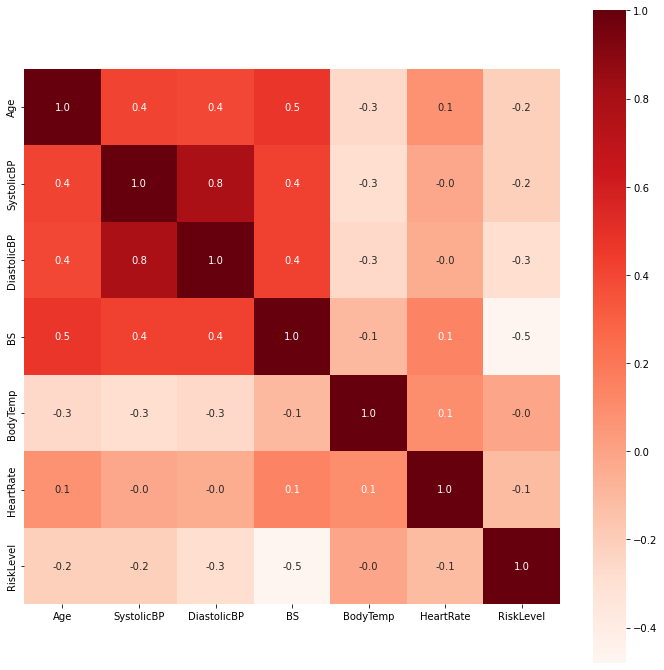

In [16]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds') 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('RiskLevel', axis=1),
                                                    df['RiskLevel'],
                                                    test_size=0.3,
                                                    random_state=0)




In [18]:
X_train.shape, X_test.shape

((709, 6), (305, 6))

In [19]:
X_train.head(4)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
993,25,120,90,15.0,98.0,80
406,25,120,80,6.8,98.0,66
643,39,110,70,7.9,98.0,80
258,18,90,60,6.9,98.0,70


In [20]:
X_test.head(4)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
921,23,120,90,7.5,98.0,70
75,23,130,70,6.9,98.0,70
608,35,100,70,7.5,98.0,66
630,22,100,65,12.0,98.0,80


In [21]:
y_train.head(4)

993    0
406    2
643    2
258    1
Name: RiskLevel, dtype: int32

In [22]:
row1 = y_train.loc[:993]
row1

993    0
Name: RiskLevel, dtype: int32

In [23]:
row2 = y_test.loc[:921]
row2

921    1
Name: RiskLevel, dtype: int32

In [24]:
y_train.shape, y_test.shape

((709,), (305,))

In [25]:
y_train.head(4)

993    0
406    2
643    2
258    1
Name: RiskLevel, dtype: int32

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
scaler.fit(X_test)


# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [28]:
X_test_scaled

array([[-0.45788549,  0.36716859,  0.93677946, -0.38291121, -0.47002282,
        -0.55299614],
       [-0.45788549,  0.90453144, -0.47104382, -0.55737343, -0.47002282,
        -0.55299614],
       [ 0.46140189, -0.70755713, -0.47104382, -0.38291121, -0.47002282,
        -1.08971475],
       ...,
       [-0.45788549, -1.24491998, -1.17495546, -0.52538869, -0.47002282,
         0.25208177],
       [ 0.38479461, -1.51360141, -1.17495546,  0.63478508,  2.47063277,
         1.59387829],
       [-0.68770734, -0.17019427, -1.17495546, -0.52829639,  1.00030497,
        -0.55299614]])

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head(4)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.304671,0.367169,0.936779,1.797867,-0.470023,0.788800
1,-0.304671,0.367169,0.232868,-0.586450,-0.470023,-1.089715
2,0.767831,-0.170194,-0.471044,-0.266603,-0.470023,0.788800
3,-0.840922,-1.244920,-1.174955,-0.557373,-0.470023,-0.552996


In [30]:
X_train_scaled

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.304671,0.367169,0.936779,1.797867,-0.470023,0.788800
1,-0.304671,0.367169,0.232868,-0.586450,-0.470023,-1.089715
2,0.767831,-0.170194,-0.471044,-0.266603,-0.470023,0.788800
3,-0.840922,-1.244920,-1.174955,-0.557373,-0.470023,-0.552996
4,-0.304671,1.441894,1.640691,1.797867,-0.028924,-0.552996
...,...,...,...,...,...,...
704,0.001758,0.904531,-0.471044,-0.382911,-0.470023,0.520441
705,-0.074849,-1.621074,-1.174955,-0.237526,1.735469,1.593878
706,-0.381278,0.367169,0.232868,-0.382911,-0.470023,-1.089715
707,0.461402,-0.707557,-0.471044,-0.382911,-0.470023,-1.089715


In [31]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head(4)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.457885,0.367169,0.936779,-0.382911,-0.470023,-0.552996
1,-0.457885,0.904531,-0.471044,-0.557373,-0.470023,-0.552996
2,0.461402,-0.707557,-0.471044,-0.382911,-0.470023,-1.089715
3,-0.534493,-0.707557,-0.823000,0.925555,-0.470023,0.788800


In [32]:

X_train.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
993,25,120,90,15.0,98.0,80
406,25,120,80,6.8,98.0,66
643,39,110,70,7.9,98.0,80
258,18,90,60,6.9,98.0,70
644,25,140,100,15.0,98.6,70


In [33]:
## Hyperparameter optimization using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [34]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [35]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [36]:
classifier=xgboost.XGBClassifier()

In [37]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [38]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train_scaled,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[15:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 6.73 seconds.


In [39]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [41]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)  #  ## missing=nan

In [42]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train_scaled,y_train,cv=10)

[15:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [43]:
score

array([0.8028169 , 0.81690141, 0.83098592, 0.90140845, 0.84507042,
       0.81690141, 0.84507042, 0.88732394, 0.77464789, 0.84285714])

In [44]:
score.mean()


0.8363983903420523

In [45]:
mod1=classifier.fit(X_train_scaled,y_train)


[15:41:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [46]:
mod1.predict(X_train_scaled)  # [0] = high risk

array([0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0,
       1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0,
       1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2,
       2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1,
       2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2,
       2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1,
       0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0,
       0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1,

In [47]:
             # low risk    = 1
              # mid risk    = 2
              # high risk   = 0

In [48]:
mod1.predict(X_test_scaled) # row2 = y_test.loc[:921]
                             #row2
                             # Actual = [1]
                             # predict = [1]

array([1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1,
       1, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0,
       1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0,
       2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1,
       2, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2,
       1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2,
       1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1,

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
GridSearchCV(cv=10,estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
              dual=False, fit_intercept=True, tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                        "penalty":["l1","l2"]})
clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

 ## With scaling

In [51]:
mod4=clf.fit(X_train_scaled,y_train)

In [52]:
mod4.best_params_


{'C': 0.01}

In [53]:
logreg1=LogisticRegression(C=1)

In [54]:
logreg1.fit(X_train_scaled,y_train)

LogisticRegression(C=1)

In [55]:
 print("score",logreg1.score(X_test_scaled,y_test)) 

score 0.6131147540983607


In [56]:
print("score",logreg1.score(X_train_scaled,y_train)) 

score 0.6459802538787024


## Without scaling 

In [57]:
## Without scaling 

from sklearn.linear_model import LogisticRegression
#logreg1 = LogisticRegression()
#lr_scaled = LogisticRegression()
logreg1.fit(X_train,y_train)
#lr_scaled.fit(X_train_scaled,y_train)
y_pred = logreg1.predict(X_test)
#y_pred_scaled = lr_scaled.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print(f"Actual:- {accuracy_score(y_test,y_pred)}")
#print(f"Scaled:- {accuracy_score(y_test,y_pred_scaled)}")

Actual:- 0.5770491803278689


In [84]:
print("score",logreg1.score(X_train,y_train)) 

score 0.5613540197461213


In [58]:
X = df.drop(['RiskLevel'],axis=1)
X.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')

In [59]:
y = df['RiskLevel'] # Target

In [60]:
y.head(7)

0    0
1    0
2    0
3    0
4    1
5    0
6    2
Name: RiskLevel, dtype: int32

In [61]:
# Data Standardization
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [62]:
# Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)

In [63]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1014, 6)
(709, 6)
(305, 6)


In [64]:
#X_test[0:6]


In [65]:
## Hyperparameter optimization using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [66]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [67]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [68]:
classifier=xgboost.XGBClassifier()

In [69]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [70]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[15:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 3.35 seconds.


In [71]:
#X_test

In [72]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [74]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)  #  ## missing=nan

In [75]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

[15:41:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [76]:
score

array([0.94117647, 0.93137255, 0.7745098 , 0.57843137, 0.59405941,
       0.89108911, 0.89108911, 0.64356436, 0.68316832, 0.89108911])

In [77]:
score.mean()


0.7819549602019025

In [78]:
mod=classifier.fit(X_train,y_train)

[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [79]:
mod.predict(X_train)

array([2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0,
       2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1,
       2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1,
       0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1,
       2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0,
       1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1,
       0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1,
       1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2,

In [80]:
y_test

293    1
37     1
908    1
922    1
557    1
      ..
983    0
768    2
901    1
786    2
883    1
Name: RiskLevel, Length: 305, dtype: int32

In [81]:
mod.predict(y_train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [82]:
#classifier.predict(X[0:47])

In [83]:
classifier.predict(X_test)

array([1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0,
       2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1,
       2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0,